# Dataset Interfaces Example Notebook

In this notebook, we provide an example of creating a dataset interface for a subset of three classes of the ImageNet dataset. We also demonstrate how to load in a pre-trained text encoder containing our learred tokens for ImageNet* to generate your own counterfactual examples for ImageNet.

In [5]:
import os
import sys
sys.path.append('../dataset_interfaces')


import torch
import matplotlib.pyplot as plt
import utils
from textual_inversion import run_textual_inversion
from generate import generate
import imagenet_utils as in_utils
import inference_utils as infer_utils

# set root to ImageNet dataset
IMAGENET_ROOT = None

To easily use the learned tokens in text prompts, we load the learned token-embedding pairs into a tokenizer and corresponding text encoder. Below we define the path where we will store the tokenizer and encoder.  

In [2]:
# path where to store an encoder, which we will load in with the learned tokens
encoder_root = "../../package_testing/encoder_root"

### Construct Dataset Interface

In [3]:
# a subset of ImageNet classes
classes = [236, 651, 10]
class_names = [in_utils.IMAGENET_COMMON_CLASS_NAMES[c] for c in classes]
tokens = [f"<{class_names[i]}-{i}>" for i in range(len(class_names))]

train_data_dirs = [os.path.join(IMAGENET_ROOT, "train", in_utils.IMAGENET_IDX_TO_SYNSET[str(c)]['id']) for c in classes]

#### Run textual inversion

In [ ]:
embeds = []
for i in range(len(classes)):
    
    # runs textual inversion on a single class
    embed = run_textual_inversion(train_data_dirs[i],
        token = tokens[i],
        class_name = class_names[i]
    )
    
    embeds.append(embed)
              

#### Save pre-loaded tokenizer and text encoder

In [10]:
infer_utils.create_token_dictionary(embeds=embeds, tokens=tokens, class_names=class_names, encoder_root=encoder_root)

### Generate Counterfactual Examples

To use our learned class tokens for the ImageNet Dataset (ImageNet*), keep `use_provided=True` <br> 
To use the tokens learned in the cells above, set `use_provided=False`

In [17]:
use_provided = True

In [18]:
if use_provided:
    classes = [236, 651, 10]
    class_names = [in_utils.IMAGENET_COMMON_CLASS_NAMES[c] for c in classes]
    root = "../../package_testing/encoder_root_imagenet"

    
else:
    classes = [0, 1, 2]
    class_names = class_names
    root = encoder_root

#### A small set of distribution shifts, as examples

In [19]:
shifts = ["base", "in the grass", "in the snow", "in bright sunlight", "oil painting"]
prompts = [
    "a photo of a <TOKEN>",
    "a photo of a <TOKEN> in the grass",
    "a photo of a <TOKEN> in the snow",
    "a photo of a <TOKEN> in bright sunlight",
    "an oil painting of a <TOKEN>"
]

#### Generating counterfactual examples in the shifts above for each class

In [20]:
imgs = []
seed = 0
for c in classes:
    imgs_class = generate(root, c, prompts, num_samples=1, random_seed=range(seed, seed+len(prompts)))
    imgs_class = generate(root, c, prompts, num_samples=1, random_seed=range(seed, seed+len(prompts)))
    imgs_class = [imgs[0] for imgs in imgs_class]
    seed += len(prompts)
        
    imgs.append(imgs_class)

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.03s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  4.94s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  4.91s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  4.94s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  4.93s/it]


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.01s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  4.95s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  4.93s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  4.93s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  4.94s/it]


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  4.94s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  4.93s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  4.97s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.03s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  4.96s/it]


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  5.00s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  4.97s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.02s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.04s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.04s/it]


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.07s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  4.97s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  4.99s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  4.96s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  4.98s/it]


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  4.95s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  4.96s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.00s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.04s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  4.98s/it]


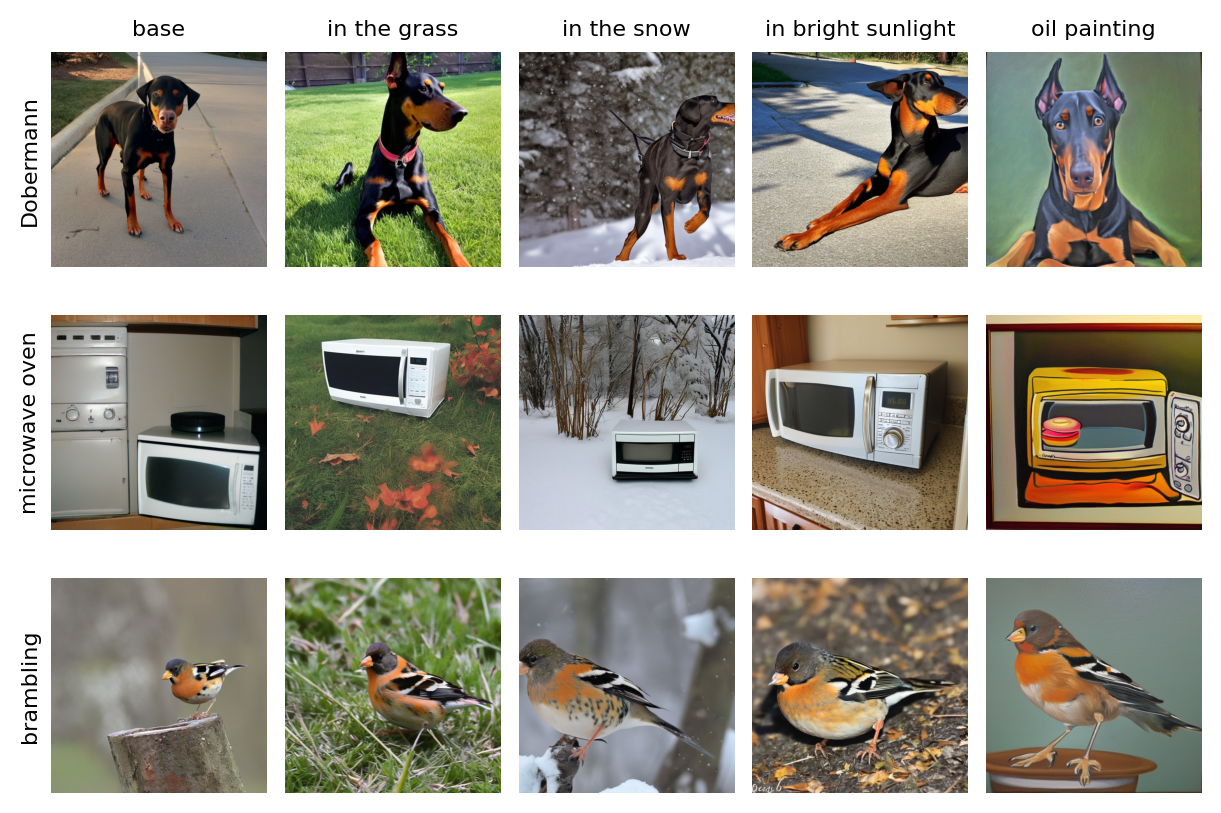

In [24]:
utils.visualize_samples(imgs, class_names, shifts, dpi=200, figsize=(6,4), fontsize=8)

### CLIP Metrics
To directly evaluate the quality of the generated image, we use CLIP similarity to quantify the presence of the object of interest and desired distribution shift in the image.

We can measure the extent to which generated images for the class "doberman" contain a doberman as follows:

In [21]:
infer_utils.clip_similarity(imgs[0], "a photo of a doberman")

tensor([0.3303, 0.3284, 0.3108, 0.3438, 0.3279], dtype=torch.float16)

We can measure the extent to which generated images in the grass are indeed in the grass as follows:

In [23]:
infer_utils.clip_similarity([imgs[i][1] for i in range(3)], "a photo in the grass")

tensor([0.2153, 0.2070, 0.2042], dtype=torch.float16)